Name: Deegan Bator

Problem Statement: Calculate the trajectory of our cannon shell including both air drag and the
reduced air density at high altitudes so that you can reproduce the results in
Figure 2.5. Perform your calculation for different firing angles and determine the
value of the angle that gives the maximum range.

Model Assumptions and Details

Gravity:Include altitude-dependent gravity. At the Earth's surface we have
g0 = 9.81 m/s².
The gravitational acceleration at altitude y is modeled as
g(y) = g0 * (R/(R + y))²,
where R ≈ 6.371 × 10^6 m is the Earth's radius.
Air Density: assume an exponential decrease of air density with altitude:
ρ(y) = ρ0 * exp(-y/H),
where ρ0 = 1.225 kg/m³ is the sea-level density and H ≈ 8000 m is the scale height.
Drag Force: The drag force is given by
F_D = - (1/2) * ρ(y) * C_d * A * v² * (v̂),
where C_d is the drag coefficient, A is the cross-sectional area, and v is the projectile's speed. The direction of the drag is opposite the velocity vector v̂. The corresponding acceleration due to drag is
a_D = F_D / m,
where m is the mass of the projectile.

We could just include a single constant for the whole drag coefficient but this is more fun, also from wikipedia

Maximum range achieved at angle (degrees): 40.0
Maximum range (m): 368.5638229874821


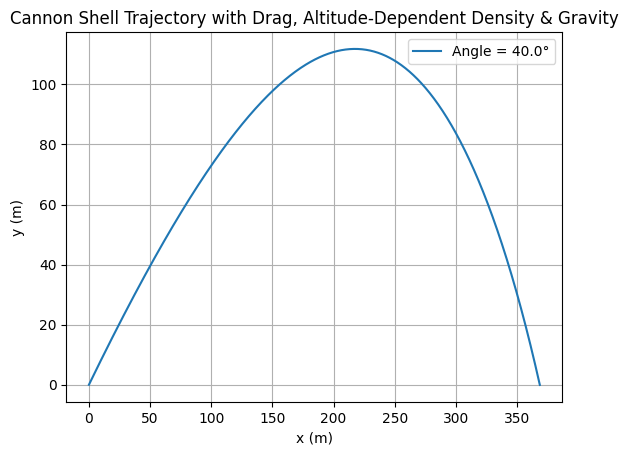

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
g0 = 9.81              # gravitational acceleration at Earth's surface (m/s^2)
R = 6.371e6            # Earth's radius (m)
rho0 = 1.225           # air density at sea level (kg/m^3)
H = 8000.0             # scale height (m) distance to decrease by factor of e
C_d = 0.47             # drag coefficient
A = 0.01               # cross-sectional area (m^2)
m = 1.0                # mass of projectile (kg)
v0 = 100.0             # initial launch speed (m/s)
dt = 0.01              # time step (s)
time_max = 200.0       # max simulation time (s)

angles = np.linspace(10, 80, 15)*np.pi/180.0  # angles in radians, from 10° to 80°

def air_density(y):
    # Exponential atmosphere
    return rho0 * np.exp(-y/H)

def gravity(y):
    # Altitude-dependent gravity
    return g0 * (R/(R+y))**2

def trajectory(angle):
    # Initial conditions
    x = 0.0
    y = 0.0
    vx = v0 * np.cos(angle)
    vy = v0 * np.sin(angle)

    x_list = [x]
    y_list = [y]

    t = 0.0
    while t < time_max and y >= 0:
        v = np.sqrt(vx**2 + vy**2)
        rho = air_density(y)
        g = gravity(y)

        # Drag force
        Fd = 0.5 * rho * C_d * A * v**2
        # Drag acceleration
        ax = -(Fd/m)*(vx/v)
        ay = -(Fd/m)*(vy/v) - g

        # Update velocities
        vx += ax * dt
        vy += ay * dt

        # Update positions
        x += vx * dt
        y += vy * dt

        x_list.append(x)
        y_list.append(y)
        t += dt

    # Compute range (interpolate if last point is below y=0)
    if y_list[-1] < 0:
        x1, y1 = x_list[-2], y_list[-2]
        x2, y2 = x_list[-1], y_list[-1]
        lam = -y1/(y2 - y1)
        xr = x1 + lam*(x2 - x1)
        return xr, x_list, y_list
    else:
        return x, x_list, y_list

# Compute trajectories for multiple angles and find the one with maximum range
best_range = 0.0
best_angle = None
best_x_list = None
best_y_list = None

for angle in angles:
    rng, xx, yy = trajectory(angle)
    if rng > best_range:
        best_range = rng
        best_angle = angle
        best_x_list = xx
        best_y_list = yy

print("Maximum range achieved at angle (degrees):", best_angle*180.0/np.pi)
print("Maximum range (m):", best_range)

# Plot the trajectory for the best angle
plt.figure()
plt.plot(best_x_list, best_y_list, label=f"Angle = {best_angle*180/np.pi:.1f}°")
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Cannon Shell Trajectory with Drag, Altitude-Dependent Density & Gravity')
plt.grid(True)
plt.legend()
plt.show()
